# Packages Imports

In [1]:
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import math
import pandas_datareader as web
import pandas as pd
import numpy as np

Using TensorFlow backend.
C:\Users\User\anaconda3\envs\Stock\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\anaconda3\envs\Stock\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\anaconda3\envs\Stock\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User\anaconda3\envs\Stock\lib\site-packag

## Variable Data

In [2]:
stock = 'AAPL'
startdate = '2015-01-01'
enddate = '2020-01-01'
future = '2020-01-02'
trainpercent = .8
history = 60
epochsize = 3

In [3]:
df = web.DataReader(stock, data_source='yahoo', start = startdate, end = enddate)

In [4]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * trainpercent)

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [6]:
x_train = []
y_train = []
train_data = scaled_data[0:training_data_len , :]
for i in range(history, len(train_data)):
    x_train.append(train_data[i-history:i, 0])
    y_train.append(train_data[i,0])

In [7]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [8]:
x_train  = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [9]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(5))
model.add(Dense(1))

In [10]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
model.fit(x_train, y_train, batch_size = 1, epochs = epochsize)


Epoch 1/3
947/947 [==============================] - 21s 22ms/step - loss: 0.0013
Epoch 2/3
947/947 [==============================] - 21s 22ms/step - loss: 7.1412e-04
Epoch 3/3
947/947 [==============================] - 21s 22ms/step - loss: 5.2472e-04


In [12]:
test_data = scaled_data[training_data_len - history: , :]
x_test = []
y_test = dataset[training_data_len:, :]

In [13]:
for i in range(history, len(test_data)):
    x_test.append(test_data[i-history:i, 0])
    


In [14]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [15]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [16]:
rmse = np.sqrt( np.mean( predictions - y_test) ** 2)

C:\Users\User\anaconda3\envs\Stock\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


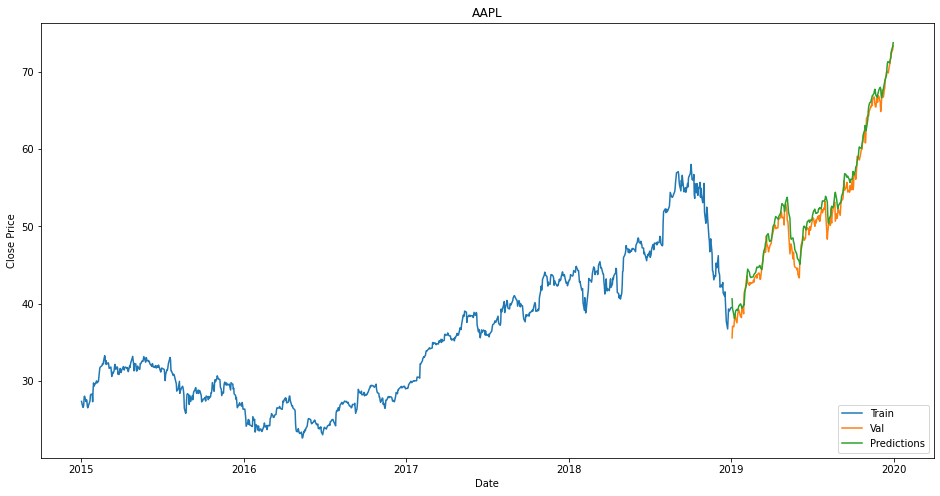

In [17]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(valid['Predictions'])
plt.title(stock)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(['Train','Val','Predictions'], loc= 'lower right')
plt.show()

In [18]:
quote = web.DataReader(stock, data_source='yahoo', start = startdate, end = enddate)
df_close = quote.filter(['Close'])
stock_history = df_close[-history:].values
stock_scaled = scaler.transform(stock_history)
X_test = []
X_test.append(stock_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
prediction_price = model.predict(X_test)
prediction_price = scaler.inverse_transform(prediction_price)
[prediction_price] = prediction_price
[prediction_price] = prediction_price
quote_end = web.DataReader(stock, data_source='yahoo', start = future, end = future)
future_price = quote_end.filter(['Close'])
future_price = future_price.values
[future_price] = future_price
[future_price] = future_price
difference = future_price - prediction_price

In [23]:
print(f'    Future Price = {future_price}')
print(f'Prediction Price = {prediction_price}')
print(f'      Difference = {difference}')
print(f'            RMSE = {rmse}')

    Future Price = 75.0875015258789
Prediction Price = 74.23629760742188
      Difference = 0.8512039184570312
            RMSE = 0.9502914702274885
